## Customer Churn Prediction Using Artificial Neural Network (ANN)

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

#### Tasks
1. Load the dataset "WA_Fn-UseC_-Telco-Customer-Churn.csv"
2. drop customerID column as it is of no use
3. Convert the TotalCharges column to numeric(float)

#### Visualize (mention the observed insights)
1. With the help of a graph visualise the relationship between tenure and Churn
2. With the help of a graph visualise the relationship between MonthlyCharges and Churn

#### Encode:
1. Print the unique values of all the categorical columns
2. Some columns such as OnlineSecurity, OnlineBackup,DeviceProtection, TechSupport, StreamingTV, StreamingMovies. have a third unique value 'No internet service' , replace all such values with 'No'

3. Encode all the columns: {"Yes":1,"No":0}

4. Perform One Hot Encoding for all the other categorical columns:
['InternetService','Contract','PaymentMethod']


### Scaling :
1. Scale the columns using MinMaxScaler ['tenure','MonthlyCharges','TotalCharges']

2. Print the unique values of all the columns after encoding and scaling

#### Model Training
1. considering Churn as target column. Divide the dataset into x and y
2. Perform train_test_split. (random_state=4)

3. Build an Artificial Neural Network Model using tensorflow

4. Evaluate Model performance for train and test data

5. Predict y

5. Define threshold as 0.5 and encode y_pred: y>=0.5 =>1  and y<0.5 =>0

6. Display the classification report and confusion matrix

In [60]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [61]:
df.drop('customerID',axis=1,inplace=True)

In [62]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [64]:
df  = df[df['TotalCharges'] != ' ']

In [65]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [66]:
df['TotalCharges']=df['TotalCharges'].astype('float')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25452\3425872132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges']=df['TotalCharges'].astype('float')


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

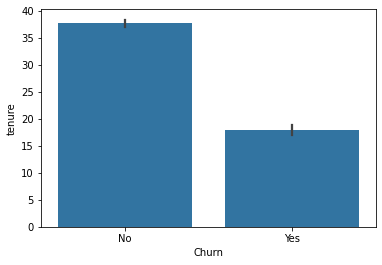

In [67]:
import seaborn as sns
sns.barplot(data=df,x='Churn',y='tenure')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

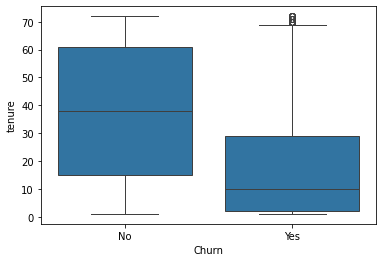

In [68]:
sns.boxplot(data=df,x='Churn',y='tenure')

In [69]:
cat_col = df.select_dtypes(include='object')
cat_col

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [70]:
for i in cat_col:
    print(i,"->",df[i].unique())

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
OnlineBackup -> ['Yes' 'No' 'No internet service']
DeviceProtection -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
StreamingMovies -> ['No' 'Yes' 'No internet service']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -> ['No' 'Yes']


In [71]:
for i in cat_col:
    print(i,"->",df[i].unique())

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
OnlineBackup -> ['Yes' 'No' 'No internet service']
DeviceProtection -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
StreamingMovies -> ['No' 'Yes' 'No internet service']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -> ['No' 'Yes']


In [72]:
for i in cat_col:
    if "No phone service" in df[i].unique() or "No internet service" in df[i].unique():
        df[i].replace({"No phone service": "No", "No internet service": "No"}, inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25452\2054036201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].replace({"No phone service": "No", "No internet service": "No"}, inplace=True)


In [73]:
for i in cat_col:
    print(i,"->",df[i].unique())

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes']
OnlineBackup -> ['Yes' 'No']
DeviceProtection -> ['No' 'Yes']
TechSupport -> ['No' 'Yes']
StreamingTV -> ['No' 'Yes']
StreamingMovies -> ['No' 'Yes']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -> ['No' 'Yes']


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
for i in cat_col:
    if (len(df[i].unique()) == 2):
        df[i] = le.fit_transform(df[i])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25452\3875144789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25452\3875144789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25452\3875144789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [76]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [77]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'],dtype='int')

In [78]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [79]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

In [80]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[columns_to_scale] = msc.fit_transform(df[columns_to_scale])

In [81]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [83]:
for i in df.columns:
    print(df[i].unique())

[0 1]
[0 1]
[1 0]
[0 1]
[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
[0.0012751  0.21586661 0.01031041 ... 0.0378086

In [85]:
x = df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [86]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [89]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [90]:
from tensorflow import keras

In [101]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4809 - accuracy: 0.7668
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7982
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8060
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8276
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8304
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8306
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8324
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8295
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8347
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8292
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8304
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8292
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 

In [104]:
loss,accuracy = model.evaluate(x_train,y_train)
loss,accuracy = model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7662


In [105]:
y_pred = model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [106]:
y_pred

array([[0.21864548],
       [0.30088308],
       [0.02838579],
       ...,
       [0.01702216],
       [0.4079336 ],
       [0.65185493]], dtype=float32)

In [107]:
threshold = 0.5

In [108]:
y_encoded = [1 if i > 0.5 else 0 for i in y_pred]

In [109]:
y_encoded

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,


In [110]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_encoded)
cm

array([[894, 138],
       [191, 184]], dtype=int64)

Text(33.0, 0.5, 'y_actual')

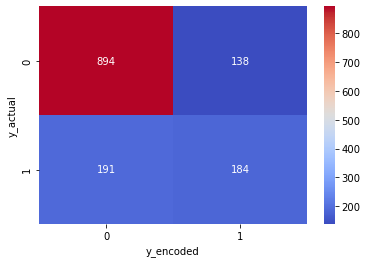

In [113]:
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='d')
plt.xlabel("y_encoded")
plt.ylabel("y_actual")